<center><h1>Linear Regression</h1></center>

Linear regression is used to determine if a set of predictor variables do a good job in predicting an outcome, or dependent, variable.  It also attempts to determine which particular variables are significant predictors of the outcome variable, and the effect they have on the outcome variable.

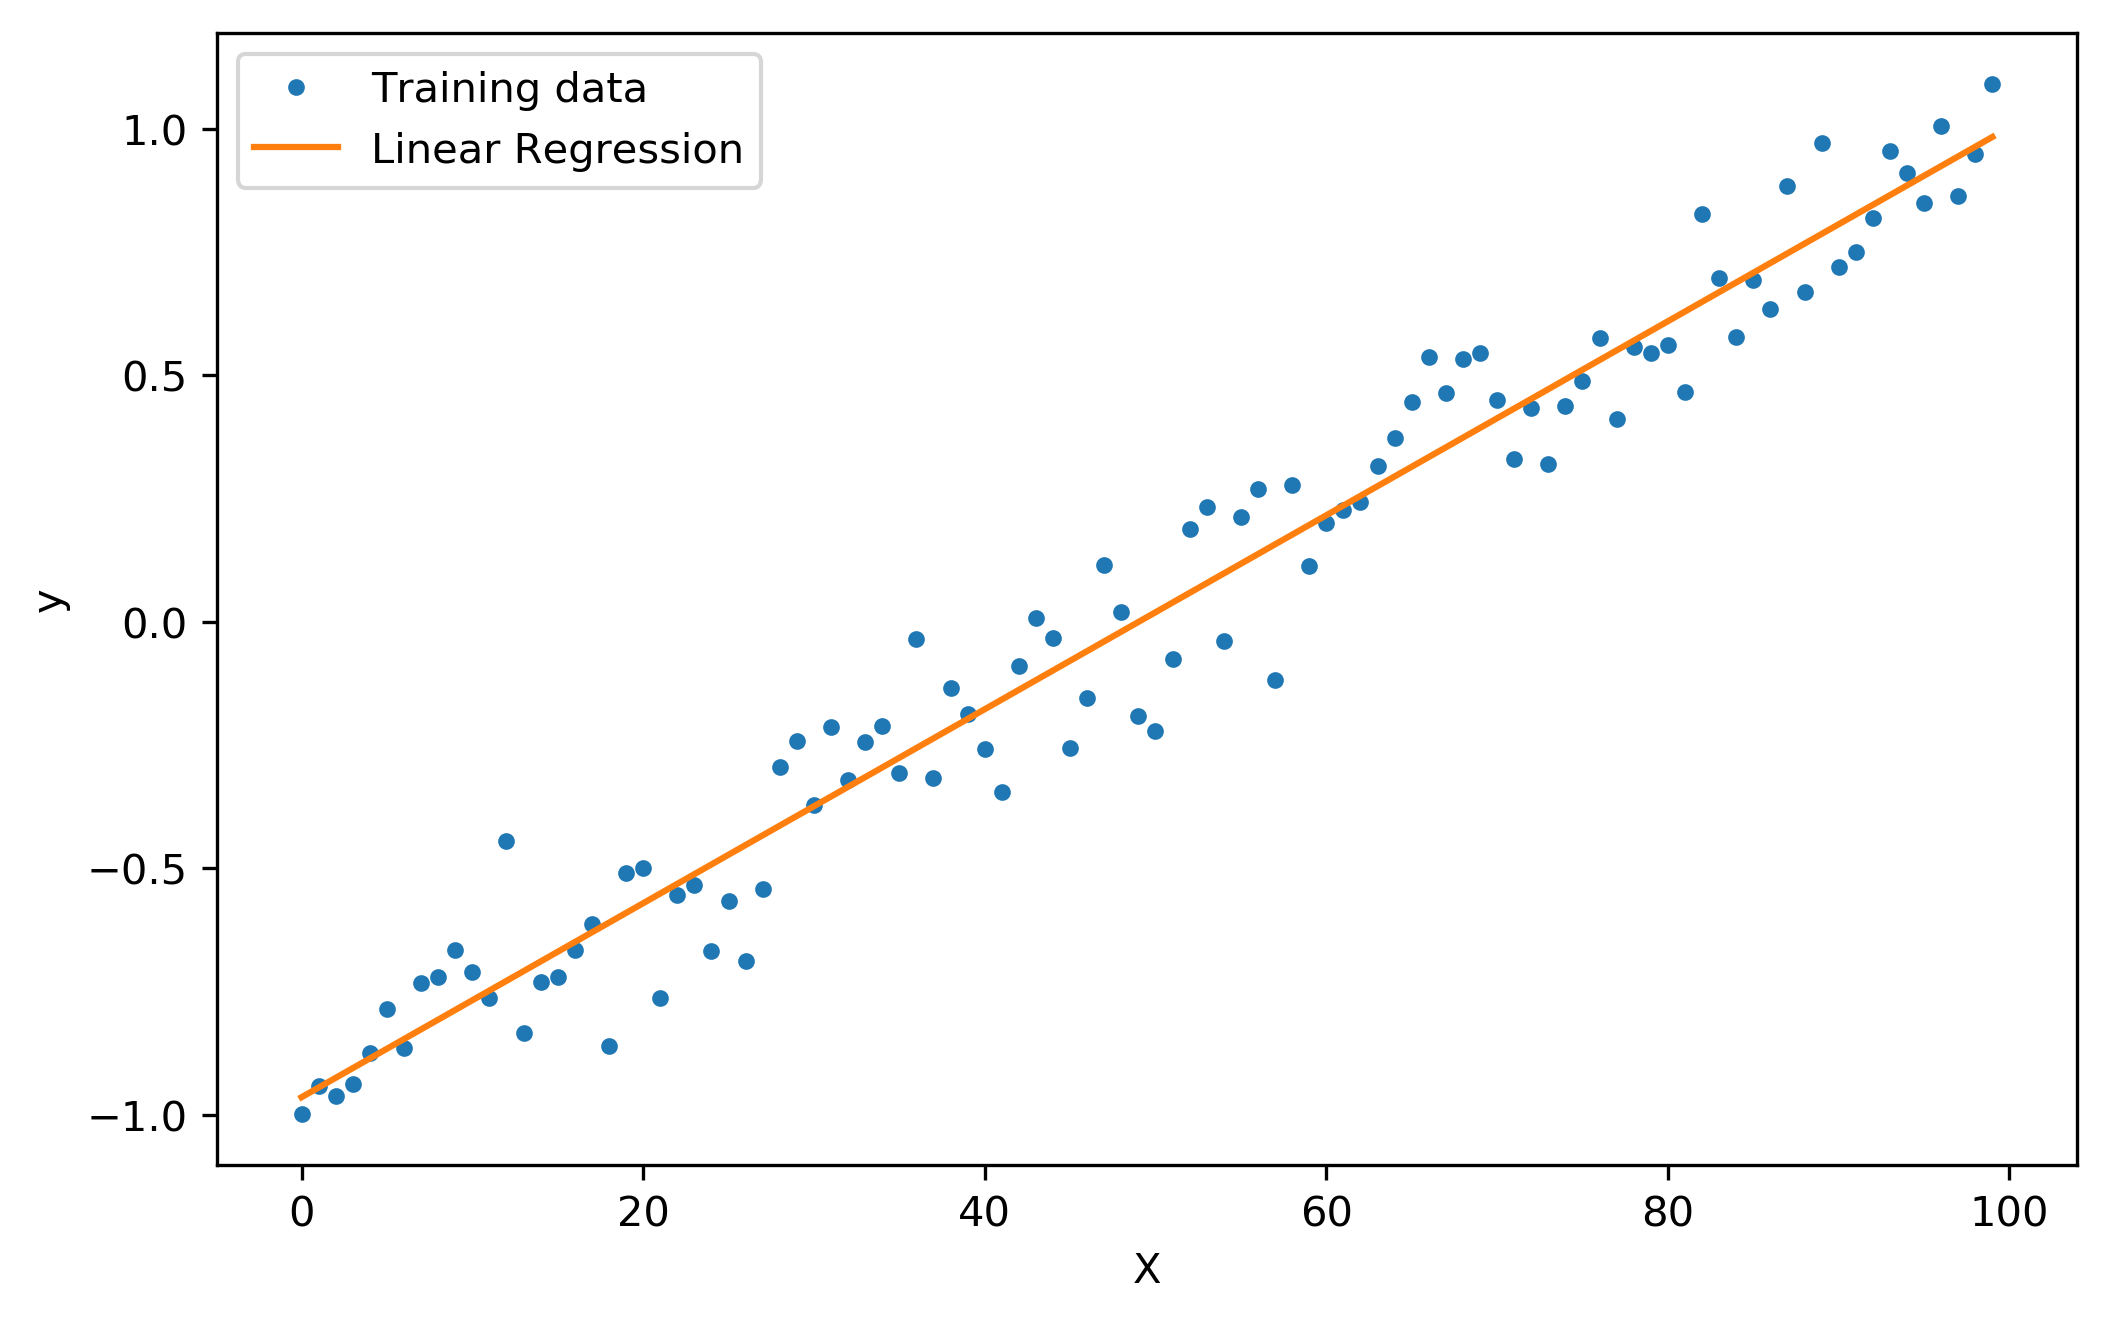

In [1]:
from IPython.display import Image
Image("images/LR_Summary.png")

<center><h7>Image from https://mlfromscratch.com/machine-learning-introduction-8-linear-regression-and-logistic-regression/#/</h7></center>

In [2]:
# Imports
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import sklearn
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import statsmodels.api as sm

print("Finished")

Finished


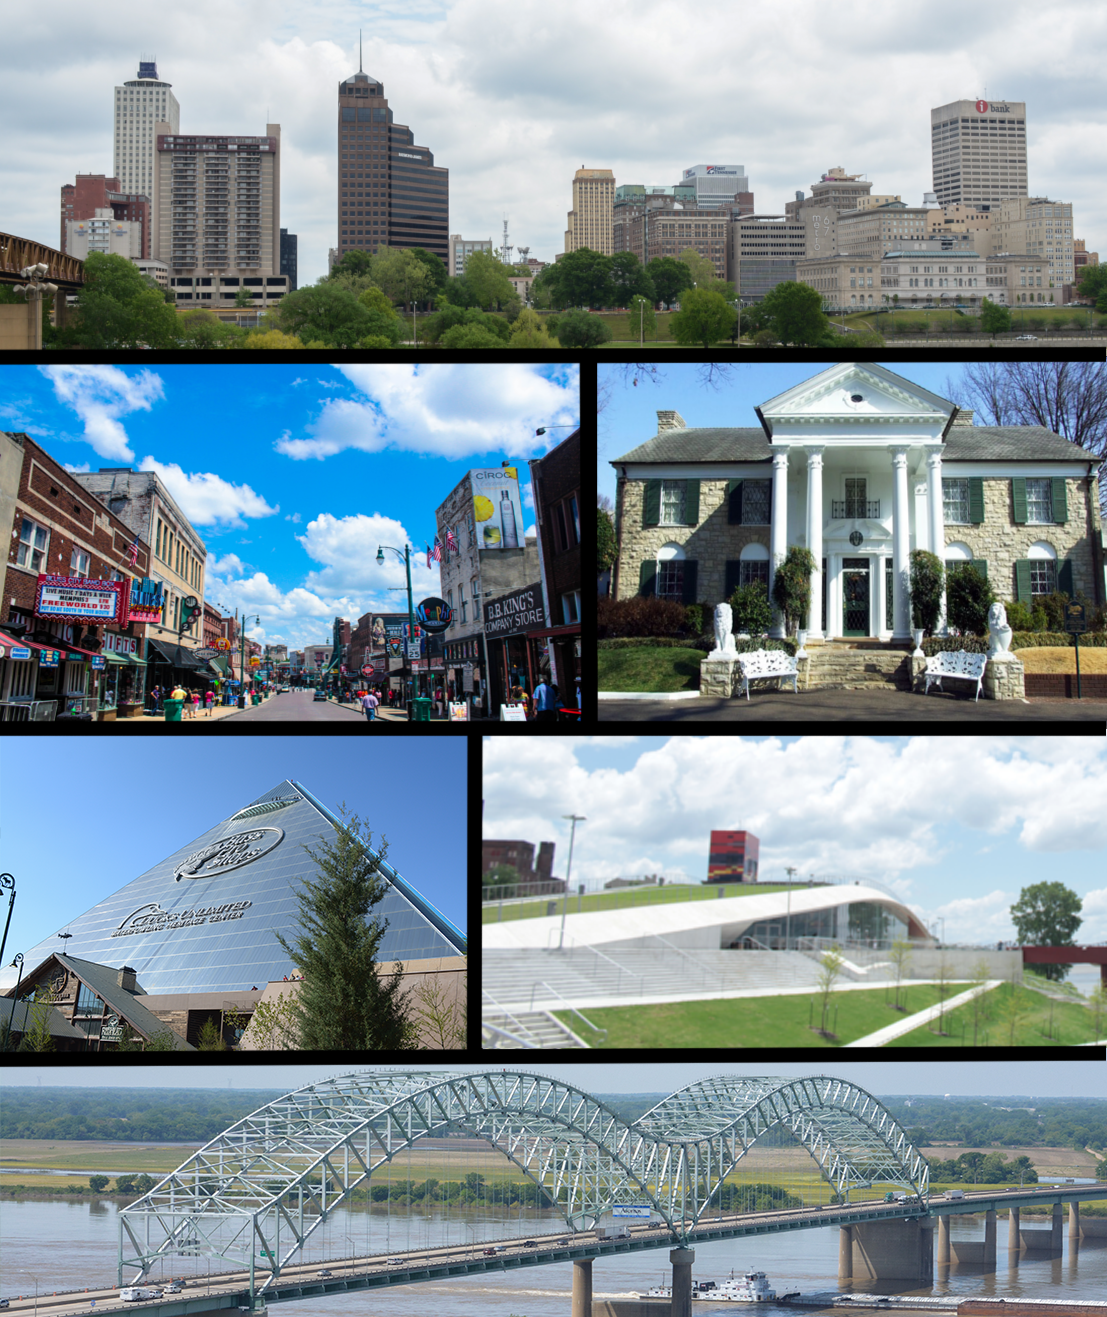

In [3]:
from IPython.display import Image
Image("images/Memphis.png")

<center><h7>Image from https://en.wikipedia.org/wiki/Memphis,_Tennessee</h7></center>

# <center> Predicting house prices in the 38118 zip code of Memphis, TN, using simple linear regression</center>



### First, import the dataset and display some basic statistics and graphs

Overview of data:
    SF  Price  Beds  Baths  Year_Built  Lot_Size_Acres  Garage_Size  Stories  \
0  855  55667     2    1.0        1955            0.17            0        1   
1  985  72576     3    1.0        1967            0.17            0        1   
2  988  54000     3    1.0        1973            0.14            0        1   

   Brick  
0      1  
1      1  
2      1  

Ranges and means for features:
Square footage ranges from 855 to 2,456.  Mean is $1,432.
Price ranges from $18,610 to $144,859. Mean is $86,186.
Number of bedrooms ranges from 2 to 5.
Number of baths ranges from 1 to 3.
Year built ranges from 1946 to 2012.
Garage size ranges from 0 to 2.
Number of stories ranges from 1 to 2.
Lot size ranges from 0.03 to 0.45 acres. Mean is 0.23.
Finished


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



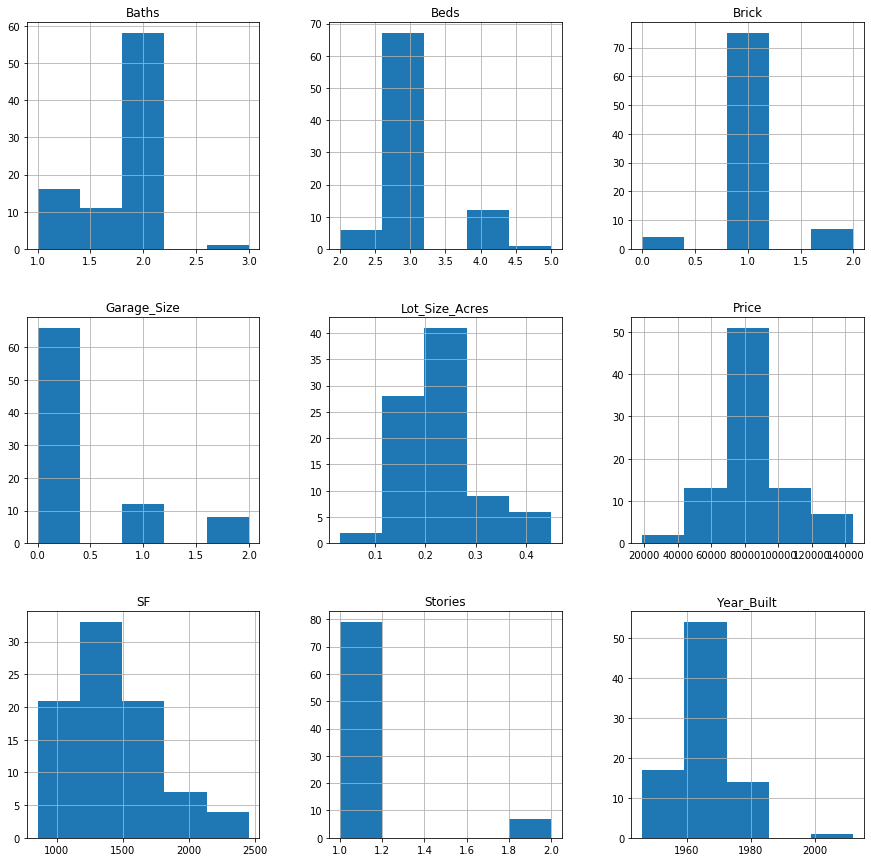

In [4]:
# Import data for houses in the 38118 zip code of Memphis, TN, for Simple Linear Regression (SLR)
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]
SLR_df = pd.read_csv('data/Linear_Regression_Memphis.csv', names=cols)


# View the first few lines of data
print("Overview of data:")
print(SLR_df.head(3))


# Display some information about the data
print("\nRanges and means for features:")
print("Square footage ranges from {:,d} to {:,d}.  Mean is ${:,d}.".format(SLR_df["SF"].min(), SLR_df["SF"].max(), int(SLR_df["SF"].mean())))
print("Price ranges from ${:,d} to ${:,d}. Mean is ${:,d}.".format(SLR_df["Price"].min(), SLR_df["Price"].max(), int(SLR_df["Price"].mean())))
print("Number of bedrooms ranges from {:,d} to {:,d}.".format(SLR_df["Beds"].min(), SLR_df["Beds"].max()))
print("Number of baths ranges from {:,d} to {:,d}.".format(int(SLR_df["Baths"].min()), int(SLR_df["Baths"].max())))
print("Year built ranges from {:d} to {:d}.".format(SLR_df["Year_Built"].min(), SLR_df["Year_Built"].max()))
print("Garage size ranges from {:d} to {:d}.".format(SLR_df["Garage_Size"].min(), SLR_df["Garage_Size"].max()))
print("Number of stories ranges from {:d} to {:d}.".format(SLR_df["Stories"].min(), SLR_df["Stories"].max()))
print("Lot size ranges from {:.2f} to {:.2f} acres. Mean is {:.2f}.".format(SLR_df["Lot_Size_Acres"].min(), SLR_df["Lot_Size_Acres"].max(), SLR_df["Lot_Size_Acres"].mean()))

# Plot histograms of the data
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
hist = SLR_df.hist(bins=5, ax = ax)

print("Finished")

### Plot a subset of the house prices as a function of the square footage

In [5]:
# Plot data with no trend line

# Pick a random subset of 20% of the rows to plot
Subset_SLR_df = SLR_df.sample(frac=0.2)

# Create scatterplot
fig = px.scatter(Subset_SLR_df, x="SF", y="Price")
fig.update_xaxes(title_text='SF')
fig.update_yaxes(title_text='Price ($)')
fig.update_layout(title_text='Sample of house prices as a function of square footage in Memphis', title_x=0.5)
fig.show()

print("Finished")

Finished


### Now plot the house prices as a function of the square footage, but this time show a trendline

In [6]:
# Plot house data with a trend line

# Create the scatterplot with trend line
fig = px.scatter(Subset_SLR_df, x="SF", y="Price", trendline="ols")
fig.update_xaxes(title_text='SF')
fig.update_yaxes(title_text='Price ($)')
fig.update_layout(title_text='Sample of house prices as a function of square footage in Memphis with trendline', title_x=0.5)
fig.show()

# Prepare to add the trendline
y = Subset_SLR_df["Price"]
x = Subset_SLR_df["SF"]

# Add the intercept
x = sm.add_constant(x)
# Create the model for the trendline and fit it
model = sm.OLS(y,x)
results = model.fit()

print("Equation for trendline = {:.2f}*SF + {:.2f}\n".format(results.params[1], results.params[0]))
print("The R-squared value = {:.3f}".format(results.rsquared))

print("Finished")

Equation for trendline = 39.12*SF + 29680.70

The R-squared value = 0.506
Finished


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



"R-squared is the percent of variance explained by the model." (https://www.statisticshowto.com/rmse/)
An R-squared value of 1.0 would mean that all values fell exactly on the trendline.  So, the higher the R-squared value, the better.  Values range from 0 to 1.0.

### Let's create a model to predict house prices.  

* We will do this using Simple Linear Regression.  It uses only 1 predictor (independent) variable, in this case square footage, to predict price.
* We will divide our data up into 2 groups - train and testing.  80% will be in train, 20% will be test.

In [7]:
# Reshape our data so it is in a usable format (convert to numpy array)
SLR_X = SLR_df['SF'].values.reshape(-1,1)
SLR_y = SLR_df['Price'].values.reshape(-1,1)

# Create train/test splits
SLR_X_train, SLR_X_test, SLR_y_train, SLR_y_test = train_test_split(SLR_X, SLR_y, test_size=0.2, random_state=0)

# Create the regressor and train the model
regressor = LinearRegression()  
regressor.fit(SLR_X_train, SLR_y_train)

# Get the slope of the regression line
slope = regressor.coef_[0][0]
slope = slope.astype(float)

# Get the intercept of the regression line
intercept = regressor.intercept_[0]
intercept = intercept.astype(float)

print(("The slope of the line for the model is {:.2f}").format(slope))
print(("The y-intercept of the line for the model is {:.2f}").format(intercept))

print("Finished")

The slope of the line for the model is 39.75
The y-intercept of the line for the model is 29385.43
Finished


### Make predictions based on the model we just created and see how well it performs.


In [8]:
# Make predictions using the test data
SLR_y_pred = regressor.predict(SLR_X_test)

# Print the predictions vs actual values and the difference
print("Simple Linear Regression Predictions:")
for i in range(0,len(SLR_y_pred)-1):
    print("SF = {:,d}, Prediction = {:,d}, Actual = {:,d}, Difference =  {:,d}".format(int(SLR_X_test[i]),
                                                                                       int(SLR_y_pred[i][0]),
                                                                                       int(SLR_y_test[i][0]),
                                                                                       int(SLR_y_pred[i][0] - SLR_y_test[i][0])))
    i = i + 1

# Print equation for regression
print("\nEquation created during training that is used to make predictions = {:.2f}*SF + {:.2f}".format(slope, intercept))

# Print equation for trendline
print("Equation for trendline = {:.2f}*SF + {:.2f}\n".format(results.params[1], results.params[0]))

print("Finished")

Simple Linear Regression Predictions:
SF = 988, Prediction = 68,657, Actual = 54,000, Difference =  14,657
SF = 1,130, Prediction = 74,301, Actual = 73,000, Difference =  1,301
SF = 1,812, Prediction = 101,410, Actual = 89,000, Difference =  12,410
SF = 1,510, Prediction = 89,406, Actual = 77,230, Difference =  12,176
SF = 1,664, Prediction = 95,527, Actual = 85,639, Difference =  9,888
SF = 1,387, Prediction = 84,517, Actual = 83,943, Difference =  574
SF = 1,600, Prediction = 92,983, Actual = 125,000, Difference =  -32,016
SF = 1,542, Prediction = 90,678, Actual = 139,900, Difference =  -49,221
SF = 2,073, Prediction = 111,785, Actual = 111,900, Difference =  -114
SF = 1,016, Prediction = 69,770, Actual = 55,000, Difference =  14,770
SF = 1,040, Prediction = 70,724, Actual = 89,900, Difference =  -19,175
SF = 1,300, Prediction = 81,059, Actual = 80,000, Difference =  1,059
SF = 1,400, Prediction = 85,033, Actual = 64,000, Difference =  21,033
SF = 1,144, Prediction = 74,858, Actual =

### Evaluate how well the model performs using the Root Mean Square Error (RMSE) metric.  

The RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. (https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/)

In [9]:
# Use RMSE metric
SLR_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(SLR_y_test,SLR_y_pred))
print('\nRoot Mean Squared Error For Simple Linear Regression: {:.2f}\n'.format(SLR_RMSE))

print("Finished")


Root Mean Squared Error For Simple Linear Regression: 19102.29

Finished


<center><h1>Predicting house prices in the 38118 zip code of Memphis, TN, using multiple variable linear regression.  We will use all the features, not just square footage. All features are standardized from -1 to 1 since the scales of each are quite different.</h1></center>



### We are using the same dataset as before.

In [10]:
# Define the columns to be used for multiple variable linear regression (MLR) and import the dataset into a dataframe
cols=["SF","Price","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]
MLR_df = pd.read_csv('data/Linear_Regression_Memphis.csv', names=cols)

# Divide dataframe into X (features) and y (price)
MLR_features = MLR_df[["SF", "Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]]
MLR_price = MLR_df["Price"]

# Create train/test splits
MLR_X_train, MLR_X_test, MLR_y_train, MLR_y_test = train_test_split(MLR_features, MLR_price, test_size=0.2, random_state=42)

# Standardize values between -1 and 1
scaler = StandardScaler()
MLR_X_train = scaler.fit_transform(MLR_X_train[["SF", "Beds","Baths","Year_Built","Lot_Size_Acres",
                                                "Garage_Size","Stories","Brick"]])

# Convert Numpy array back to dataframe with the newly scaled values
MLR_X_train = pd.DataFrame(MLR_X_train)

# When creating a numpy array (which happens during scaling), the column names are removed.  Since we changed
# the numpy array back to a df, the column names need to be re-added
MLR_X_train.columns =["SF","Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]

print("Finished")

Finished


### Let's create a model to predict house prices.
* We will still do this using linear regression, but the model will take all features into account.
* We will divide our data up into 2 groups - the training group and testing group. 80% will be in training, 20% in testing.

In [11]:
# Create the regressor and train the model
# Note: There is some multi-collinearity in the data that could be dealt with by Ridge regression,
# but for simplicity in this example, we use standard linear regression.
# You can see the difference by changing "LinearRegression" to "Ridge" and testing.
# Try "Lasso" as well just for fun.
regressor = LinearRegression()  
regressor.fit(MLR_X_train, MLR_y_train)

print("Finished")

Finished


### Now that we have the model, let's see the effect each features has on predictions.

In [12]:
# Get the coefficients for each of the features and print
MLR_coeff_df = pd.DataFrame(regressor.coef_, MLR_X_train.columns, columns=['Coefficient'])
print("The coefficients for each feature are: ")
print(MLR_coeff_df)

# Print the intercept
print("\nThe intercept is {:.2f}\n".format(regressor.intercept_))

# Show the equation
cols_for_equation=["SF", "Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]
equation = "Price = "
for i in range(0,len(cols_for_equation)):
    equation = equation + "({:.2f}*{}) +".format(MLR_coeff_df.iloc[i,0]/100, cols_for_equation[i])

equation = equation + "(" + str(regressor.intercept_ / 100) + ")"

print("*****\nThe equation created during training that is used to make predictions (coefficients divided by 100 to make it easier to read) = \n")
print(equation)

print("Finished")

The coefficients for each feature are: 
                 Coefficient
SF              12688.963335
Beds             -734.857581
Baths            1806.382710
Year_Built       2731.609911
Lot_Size_Acres   4918.324522
Garage_Size     -1179.468059
Stories          3765.363002
Brick            3489.606214

The intercept is 87735.85

*****
The equation created during training that is used to make predictions (coefficients divided by 100 to make it easier to read) = 

Price = (126.89*SF) +(-7.35*Beds) +(18.06*Baths) +(27.32*Year_Built) +(49.18*Lot_Size_Acres) +(-11.79*Garage_Size) +(37.65*Stories) +(34.90*Brick) +(877.3585294117647)
Finished


### Explanation of coefficients
* The size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, in this case, the price.  The sign on the coefficient (positive or negative) gives you the direction of the effect. The coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.  (https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#coefficients)
* The square footage has the greatest effect on price followed by the lot size.  Both of these make intuitive sense.
* Garage size had a negative effect on the price.

### Make predictions based on the model we just created and see how well it performs

In [13]:
# Save a copy of the original data frame since the df is eventually going to be scaled and the actual values
# are needed to print out the actual vs. predicted values.
MLR_X_test_original = MLR_X_test

# Scale the data as we did when training the model
scaler = StandardScaler()
MLR_X_test = scaler.fit_transform(MLR_X_test[["SF", "Beds","Baths","Year_Built","Lot_Size_Acres","Garage_Size","Stories","Brick"]])
# Make the predictions
MLR_y_pred = regressor.predict(MLR_X_test)

# Create a df of predictions
MLR_Actual_Predicted_df = pd.DataFrame({'Predicted': MLR_y_pred, 'Actual': MLR_y_test})

# Print the predictions vs actual values
print("Predictions:")
for i in range(0,len(MLR_y_pred)-1):
    print("SF = {:,d}, Prediction = {:,d}, Actual = {:,d}, Difference =  {:,d}".format(int(MLR_X_test_original.iloc[i][0]),
                                                                                       int(MLR_Actual_Predicted_df.iloc[i][1]),
                                                                                       int(MLR_Actual_Predicted_df.iloc[i][0]),
                                                                                       int(MLR_Actual_Predicted_df.iloc[i][1] - int(MLR_Actual_Predicted_df.iloc[i][0]))))
    i = i + 1

print("Finished")

Predictions:
SF = 2,093, Prediction = 118,914, Actual = 104,764, Difference =  14,150
SF = 855, Prediction = 55,667, Actual = 59,867, Difference =  -4,200
SF = 1,496, Prediction = 118,353, Actual = 91,972, Difference =  26,381
SF = 1,248, Prediction = 55,023, Actual = 74,050, Difference =  -19,027
SF = 1,120, Prediction = 91,141, Actual = 76,394, Difference =  14,747
SF = 1,907, Prediction = 123,526, Actual = 111,033, Difference =  12,493
SF = 1,113, Prediction = 57,321, Actual = 72,199, Difference =  -14,878
SF = 1,182, Prediction = 18,610, Actual = 89,362, Difference =  -70,752
SF = 1,001, Prediction = 65,500, Actual = 85,729, Difference =  -20,229
SF = 1,333, Prediction = 83,822, Actual = 93,450, Difference =  -9,628
SF = 1,181, Prediction = 75,937, Actual = 76,619, Difference =  -682
SF = 2,238, Prediction = 95,741, Actual = 108,098, Difference =  -12,357
SF = 1,812, Prediction = 89,000, Actual = 92,816, Difference =  -3,816
SF = 1,483, Prediction = 101,084, Actual = 90,415, Differ

### Evaluate how well the model performs using the Root Mean Square Error (RMSE) metric.  

In [14]:
# Use RMSE metric
MLR_RMSE = np.sqrt(sklearn.metrics.mean_squared_error(MLR_y_test, MLR_y_pred))
print('\nRoot Mean Squared Error: {:.2f}'.format(MLR_RMSE))


Root Mean Squared Error: 21809.91


# Comparisons of Simple Linear Regression versus Multiple Variable Linear Regression

### Compare RMSE

In [15]:
# Show RMSE for SLR vs MLR

print(("RMSE for Simple Linear Regression = {:.2f}\nRMSE for Multiple Linear Regression = {:.2f}").format(SLR_RMSE, MLR_RMSE))

RMSE for Simple Linear Regression = 19102.29
RMSE for Multiple Linear Regression = 21809.91


### Compare simple linear regression predictions to multiple linear regression predictions

In [16]:
# Print the SLR predictions vs MLR prediction
print("SLR predictions vs MLR prediction:")
SLR_total = 0
MLR_total = 0
for i in range(0,len(MLR_y_pred)-1):
    
    prediction = ""
    prediction = prediction + "SF = {:,d}, SLR Prediction = {:,d}, MLR Prediction = {:,d}, Actual = {:,d}".format(int(MLR_X_test_original.iloc[i][0]),
                                                                                       int(SLR_y_pred[i][0]),
                                                                                       int(MLR_Actual_Predicted_df.iloc[i][1]),
                                                                                       int(MLR_Actual_Predicted_df.iloc[i][0]))

    # Calculate differences to determine which mad a better predition
    SLR_diff = abs(int(SLR_y_pred[i][0]) - int(MLR_Actual_Predicted_df.iloc[i][0]))
    MLR_diff = abs(int(MLR_Actual_Predicted_df.iloc[i][1]) - int(MLR_Actual_Predicted_df.iloc[i][0]))

    if (SLR_diff < MLR_diff):
        prediction = prediction + " - SLR made a better prediction"
        SLR_total += 1
    else:
        prediction = prediction + " - MLR made a better prediction"
        MLR_total += 1
        
    print(prediction)
    i = i + 1

print("\nSLR made {:d} better predictions".format(SLR_total))
print("MLR made {:d} better predictions".format(MLR_total))

SLR predictions vs MLR prediction:
SF = 2,093, SLR Prediction = 68,657, MLR Prediction = 118,914, Actual = 104,764 - MLR made a better prediction
SF = 855, SLR Prediction = 74,301, MLR Prediction = 55,667, Actual = 59,867 - MLR made a better prediction
SF = 1,496, SLR Prediction = 101,410, MLR Prediction = 118,353, Actual = 91,972 - SLR made a better prediction
SF = 1,248, SLR Prediction = 89,406, MLR Prediction = 55,023, Actual = 74,050 - SLR made a better prediction
SF = 1,120, SLR Prediction = 95,527, MLR Prediction = 91,141, Actual = 76,394 - MLR made a better prediction
SF = 1,907, SLR Prediction = 84,517, MLR Prediction = 123,526, Actual = 111,033 - MLR made a better prediction
SF = 1,113, SLR Prediction = 92,983, MLR Prediction = 57,321, Actual = 72,199 - MLR made a better prediction
SF = 1,182, SLR Prediction = 90,678, MLR Prediction = 18,610, Actual = 89,362 - SLR made a better prediction
SF = 1,001, SLR Prediction = 111,785, MLR Prediction = 65,500, Actual = 85,729 - MLR made

# Conclusions

Based on the dataset used in this experiment, multiple linear regression performed slightly better than simple linear regression.  This will vary depending on the dataset and which data points are used to train the model and make predictions.  

How could the model be improved?  Here are some possibilities.

* Larger dataset
* More features
* Use ridge or lasso regression for regularization of features
* Remove collinear variables
* Feature engineering

Try some of these out if you get a chance!

Credits
* https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* www.plotly.com
* https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
* https://www.statisticshowto.com/rmse/
* https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#coefficients
* All the house information came from www.zillow.com
